<a href="https://colab.research.google.com/github/ThejeshwarAB/SIH2020/blob/master/SIH2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#code0
 
#importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [ ]:
#code1

#uploading face dataset
from google.colab import files
face = files.upload()

Saving FACE.zip to FACE.zip


In [ ]:
#code2
 
#installing unzip
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
#code3

#unzipping of dataset
data=!unzip FACE.zip
data

['Archive:  FACE.zip',
 '   creating: FACE/',
 '  inflating: FACE/aa (1).jpg_face.jpg  ',
 '  inflating: FACE/aa (10).jpg_face.jpg  ',
 '  inflating: FACE/aa (100).jpg_face.jpg  ',
 '  inflating: FACE/aa (101).jpg_face.jpg  ',
 '  inflating: FACE/aa (102).jpg_face.jpg  ',
 '  inflating: FACE/aa (103).jpg_face.jpg  ',
 '  inflating: FACE/aa (104).jpg_face.jpg  ',
 '  inflating: FACE/aa (105).jpg_face.jpg  ',
 '  inflating: FACE/aa (106).jpg_face.jpg  ',
 '  inflating: FACE/aa (107).jpg_face.jpg  ',
 '  inflating: FACE/aa (108).jpg_face.jpg  ',
 '  inflating: FACE/aa (109).jpg_face.jpg  ',
 '  inflating: FACE/aa (11).jpg_face.jpg  ',
 '  inflating: FACE/aa (110).jpg_face.jpg  ',
 '  inflating: FACE/aa (111).jpg_face.jpg  ',
 '  inflating: FACE/aa (112).jpg_face.jpg  ',
 '  inflating: FACE/aa (113).jpg_face.jpg  ',
 '  inflating: FACE/aa (114).jpg_face.jpg  ',
 '  inflating: FACE/aa (115).jpg_face.jpg  ',
 '  inflating: FACE/aa (116).jpg_face.jpg  ',
 '  inflating: FACE/aa (117).jpg_face.

In [ ]:
#code4

#loading images
def loadImages(path):
  image_files=sorted([os.path.join(path,file)
  for file in os.listdir(path)
  if file.endswith('.jpg')])
  return image_files
    

In [ ]:
#code5
image_path="/content/FACE"
#calling loadImage function
global image_path
dataset=loadImages(image_path)
print(len(dataset))

8869


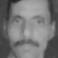

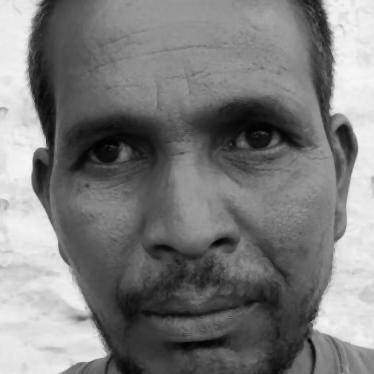

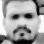

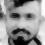

In [ ]:
#code6

#displaying first 4 images in dataset
from google.colab.patches import cv2_imshow
import cv2
cv2_imshow(cv2.imread(dataset[0]))
cv2_imshow(cv2.imread(dataset[1]))
cv2_imshow(cv2.imread(dataset[2]))
cv2_imshow(cv2.imread(dataset[3]))

To do text column:

Preprocess data:

1. Make duplicates to train set
2. Find min size out of all images
3. Perform resizing to that min size
4. Once done perform scaling operations

Add duplicates to test data

Classify using CNN

Synthesize

In [ ]:
#code7

#perform detailed analysis

print(type(dataset))

data = pd.DataFrame(dataset)
print(type(data))

print(data.describe())
print(data.head(5))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
                                           0
count                                   8869
unique                                  8869
top     /content/FACE/IIII (17).jpg_face.jpg
freq                                       1
                                    0
0    /content/FACE/I (1).jpg_face.jpg
1   /content/FACE/I (10).jpg_face.jpg
2  /content/FACE/I (100).jpg_face.jpg
3  /content/FACE/I (101).jpg_face.jpg
4  /content/FACE/I (103).jpg_face.jpg


In [ ]:
#code8

#for reference
initial_df = data.copy(deep=True)
initial_df = initial_df.values.tolist()

In [ ]:
#code9

'''
use initial_df list and convert it to numpy array
later we'll do stuff there
'''

print(initial_df[2])

# example of loading an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
df=[]
for i in range(len(initial_df)):
  path=initial_df[i]
  img = load_img(''.join(initial_df[i]))
  x = img_to_array(img)
  df.append(x)

#df is unclean data with all images
print(type(df))

['/content/FACE/I (100).jpg_face.jpg']
<class 'list'>


In [ ]:
from imutils import paths
import numpy as np
import argparse
import cv2
import os

In [ ]:

#creating hash function for duplicates
def dhash(image, hashSize=8):
  gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
  resized = cv2.resize(gray, (hashSize + 1, hashSize))
  diff = resized[:, 1:] > resized[:, :-1]
  return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

In [ ]:
#computing hash
print("[INFO] computing image hashes...")
hashes = {}
# loop over our image paths
for i in range(len(initial_df)):
  path=initial_df[i]
  image = load_img(''.join(initial_df[i]))
  h = dhash(image)
  p = hashes.get(h, [])
  p.append(initial_df[i])
  hashes[h] = p

[INFO] computing image hashes...


In [ ]:
#making duplicates as test
test=[]
for (h, hashedPaths) in hashes.items():
  if len(hashedPaths) > 1:
    for p in hashedPaths[1:]:
      test.append(p)
      os.remove(''.join(p))
print(len(initial_df))


8869


In [ ]:
#finding minimum size
from PIL import Image
min_w, min_h = 10000000, 10000000
for i in range(len(initial_df)):
  path=initial_df[i]
  img = load_img(''.join(initial_df[i]))
  width, height = img.size
  min_w = min( min_w, width)
  min_h = min( min_h, height)
print(min_w, min_h)

23 23


In [ ]:
#resizing images to 300*300 px
resized_test=[]
resized_train=[]
dim=(300,300)
for i in range(len(initial_df)):
  path=initial_df[i]
  img = load_img(''.join(initial_df[i]))
  resized=cv2.resize(np.array(img), dim, interpolation = cv2.INTER_AREA)
  resized_train.append(resized)
for i in range(len(test)):
  path=test[i]
  img = load_img(''.join(test[i]))
  resized = cv2.resize(np.array(img), dim, interpolation = cv2.INTER_AREA)
  resized_test.append(resized)

In [ ]:
#cropping of images
def cropping(im_path):
  img = load_img(''.join(im_path))
  gray = cv2.cvtColor(resized_train[3], cv2.COLOR_BGR2GRAY) # convert to grayscale
  retval, thresh_gray = cv2.threshold(gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
  points = np.argwhere(thresh_gray==0) # find where the black pixels are
  points = np.fliplr(points) # store them in x,y coordinates instead of row,col indices
  x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
  x, y, w, h = x,y, w+500, h+500 # make the box a little bigger
  crop = gray[y:y+h, x:x+w] # create a cropped region of the gray image
  retval, thresh_crop = cv2.threshold(crop, thresh=200, maxval=255, type=cv2.THRESH_BINARY)
  return thresh_crop

In [ ]:
#storing cropped images in sep list
import cv2
import numpy as np
cropped_test=[]
cropped_train=[]
for i in range(len(initial_df)):
  cropped_train.append(cropping(initial_df[i]))
for i in range(len(test)):
  cropped_test.append(cropping(test[i])) 


In [ ]:
import cv2
import dlib
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 "shape_predictor_68_face_landmarks.dat.bz2"

--2020-07-30 10:28:15--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  23.7MB/s    in 2.6s    

2020-07-30 10:28:17 (23.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
#landmarks collected from net
from collections import OrderedDict
FACIAL_LANDMARKS_IDXS = OrderedDict([
	("mouth", (48, 68)),
	("right_eyebrow", (17, 22)),
	("left_eyebrow", (22, 27)),
	("right_eye", (36, 42)),
	("left_eye", (42, 4)),
	("nose", (27, 35)),
	("jaw", (0, 17))
 ])

In [ ]:
#extracting facial features
from imutils import face_utils
import imutils
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# load the input image, resize it, and convert it to grayscale
c=0
for img in initial_df:
  image = cv2.imread(''.join(img))
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 1)#landmark detection
  for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():#looping through each feature and landmark in ordered dict
      clone = image.copy()
      cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 0, 255), 2)
      for (x, y) in shape[i:j]:#extracting feature
        cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
        (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
      roi = image[y:y+h, x:x+w]#storing extracted deature into region of interest
      roi = imutils.resize(roi, inter=cv2.INTER_CUBIC)#no need
      if(name=="mouth"):
        cv2.imwrite('/content/Extracted/Mouth/mouth'+str(c)+'.jpeg',roi)
      elif(name=="right_eye"):
        cv2.imwrite('/content/Extracted/Right_eye/right_eye'+str(c)+'.jpeg',roi)
      elif(name=="left_eye"):
         cv2.imwrite('/content/Extracted/left_eye/left_eye'+str(c)+'.jpeg',roi)
      elif(name=="right_eyebrow"):
         cv2.imwrite('/content/Extracted/right_eyebrow/right_eyebrow'+str(c)+'.jpeg',roi)
      elif(name=="left_eyebrow"):
         cv2.imwrite('/content/Extracted/left_eyebrow/left_eyebrow'+str(c)+'.jpeg',roi)
      elif(name=="nose"):
        cv2.imwrite('/content/Extracted/nose/nose'+str(c)+'.jpeg',roi)
      elif(name=="jaw"):
        continue
  c+=1


In [ ]:
from imutils import face_utils
import imutils
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# load the input image, resize it, and convert it to grayscale
c=0
for k in range(len(initial_df)):
  image = cv2.imread(''.join(initial_df[j]))
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 1)#landmark detection
  for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():#looping through each feature and landmark in ordered dict
      clone = image.copy()
      cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 0, 255), 2)
      for (x, y) in shape[i:j]:#extracting feature
        cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
        (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
      roi = image[y:y+h, x:x+w]#storing extracted deature into region of interest
      roi = imutils.resize(roi, inter=cv2.INTER_CUBIC)#no need
      l,m,c=roi.shape
      if(name=="jaw"):
        if(m>0):
          cv2.imwrite('/content/Extracted/jaw/jaw'+str(k)+'.jpeg',roi)
          cv2.imwrite('/content/Extracted/face/face'+str(k)+'.jpeg',image)
  

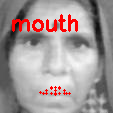

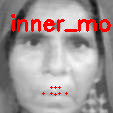

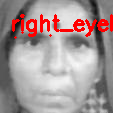

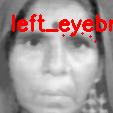

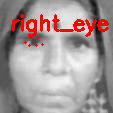

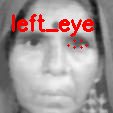

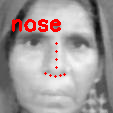

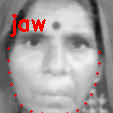

In [ ]:
#sample output images stored in folders
image = cv2.imread(''.join(initial_df[3]))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)#landmark detection
for (i, rect) in enumerate(rects):
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)
  for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
    clone = image.copy()
    cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 0, 255), 2)
    for (x, y) in shape[i:j]:
      cv2.circle(clone, (x, y), 1, (0, 0, 255), -1)
      (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]]))
    roi = image[y:y+h, x:x+w]
    roi = imutils.resize(roi, width=25,height=100, inter=cv2.INTER_CUBIC)
    cv2_imshow(roi)
    cv2_imshow(clone)

In [ ]:
import keras
import numpy as np
from keras.applications import resnet50
from keras.models import Sequential
from imutils import paths
import numpy as np
import argparse
import cv2
import os
from keras.preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
my_new_model = Sequential()
my_new_model.add(resnet50.ResNet50(include_top=False, pooling='avg', weights='imagenet'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

94658560/94653016 [==============================] - 1s 0us/step


In [ ]:
def loadImages(path):
  image_files=sorted([os.path.join(path,file)
  for file in os.listdir(path)
  if file.endswith('.jpeg')])
  return image_files

In [ ]:
jaw=loadImages("/content/Extracted/jaw")

In [ ]:
face=loadImages("/content/Extracted/face")

In [ ]:
#loading image folders
mouth=loadImages("/content/Extracted/Mouth")
dataset=loadImages(image_path)
right_eye=loadImages("/content/Extracted/Right_eye")
left_eye=loadImages("/content/Extracted/left_eye")
nose=loadImages("/content/Extracted/nose")
right_eyebrow=loadImages("/content/Extracted/right_eyebrow")
left_eyebrow=loadImages("/content/Extracted/left_eyebrow")

In [ ]:
#feature extraction
def extract_vector(path):
    resnet_feature_list = []

    for im in path:
        im = load_img(''.join(im))
        im = cv2.resize(np.array(im),(224,224))
        img = preprocess_input(np.expand_dims(im.copy(), axis=0))
        resnet_feature = my_new_model.predict(img)
        resnet_feature_np = np.array(resnet_feature)
        resnet_feature_list.append(resnet_feature_np.flatten())

    return np.array(resnet_feature_list)

In [ ]:
jaw_extracts=extract_vector(jaw)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(jaw_extracts)
c=0
for i in range(len(jaw)):
  if(kmeans.labels_[i]==1):
    cv2.imwrite('/content/clustersJaw/cluster one'+str(c)+'.jpeg',cv2.imread(''.join(jaw[i])))
    cv2.imwrite('/content/Jawface/cluster one'+str(c)+'.jpeg',cv2.imread(''.join(face[i])))
  elif(kmeans.labels_[i]==2):
    cv2.imwrite('/content/clustersJaw/cluster two'+str(c)+'.jpeg',cv2.imread(''.join(jaw[i])))
    cv2.imwrite('/content/Jawface/cluster two'+str(c)+'.jpeg',cv2.imread(''.join(face[i])))
  elif(kmeans.labels_[i]==3):
    cv2.imwrite('/content/clustersJaw/cluster three'+str(c)+'.jpeg',cv2.imread(''.join(jaw[i])))
    cv2.imwrite('/content/Jawface/cluster three'+str(c)+'.jpeg',cv2.imread(''.join(face[i])))
  elif(kmeans.labels_[i]==4):
    cv2.imwrite('/content/clustersJaw/cluster four'+str(c)+'.jpeg',cv2.imread(''.join(jaw[i])))
    cv2.imwrite('/content/Jawface/cluster four'+str(c)+'.jpeg',cv2.imread(''.join(face[i])))
  c+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """Entry point for launching an IPython kernel.


In [ ]:
mouth_extracts=extract_vector(mouth)

In [ ]:
#extracting mouth feature
kmeans = KMeans(n_clusters=4, random_state=0).fit(mouth_extracts)
c=0
for i in range(len(dataset)):
  if(kmeans.labels_[i]==1):
    cv2.imwrite('/content/clustersMouth/cluster one'+str(c)+'.jpeg',cv2.imread(''.join(mouth[i])))
  elif(kmeans.labels_[i]==2):
    cv2.imwrite('/content/clustersMouth/cluster two'+str(c)+'.jpeg',cv2.imread(''.join(mouth[i])))
  elif(kmeans.labels_[i]==3):
    cv2.imwrite('/content/clustersMouth/cluster three'+str(c)+'.jpeg',cv2.imread(''.join(mouth[i])))
  elif(kmeans.labels_[i]==4):
    cv2.imwrite('/content/clustersMouth/cluster four'+str(c)+'.jpeg',cv2.imread(''.join(mouth[i])))
  c+=1

In [ ]:
#extracting features
right_eye_extracts=extract_vector(right_eye)


'left_eye_extracts=extract_vector(left_eye)\nright_eyebrow_extracts=extract_vector(right_eyebrow)\nleft_eyebrow_extracts=extract_vector(left_eyebrow)'

In [ ]:
left_eye_extracts=extract_vector(left_eye)

In [ ]:
nose_extracts=extract_vector(nose)

In [ ]:
#clustering right eye
kmeans = KMeans(n_clusters=4, random_state=0).fit(nose_extracts)
c=0
for i in range(len(nose)):
  if(kmeans.labels_[i]==1):
    cv2.imwrite('/content/clustersnose/cluster one'+str(c)+'.jpeg',cv2.imread(''.join(nose[i])))
  elif(kmeans.labels_[i]==2):
    cv2.imwrite('/content/clustersnose/cluster two'+str(c)+'.jpeg',cv2.imread(''.join(nose[i])))
  elif(kmeans.labels_[i]==3):
    cv2.imwrite('/content/clustersnose/cluster three'+str(c)+'.jpeg',cv2.imread(''.join(nose[i])))
  elif(kmeans.labels_[i]==4):
    cv2.imwrite('/content/clustersnose/cluster four'+str(c)+'.jpeg',cv2.imread(''.join(nose[i])))
  c+=1

In [ ]:
print("____left_eye_____")
silhoute_score_cal(left_eye_extracts)

____left_eye_____
For n_clusters = 2, silhouette score is 0.17299510538578033)
For n_clusters = 3, silhouette score is 0.1714453548192978)
For n_clusters = 4, silhouette score is 0.17583245038986206)
For n_clusters = 5, silhouette score is 0.13984709978103638)
For n_clusters = 6, silhouette score is 0.1436048150062561)
For n_clusters = 7, silhouette score is 0.12381123006343842)
For n_clusters = 8, silhouette score is 0.11713608354330063)
For n_clusters = 9, silhouette score is 0.11670560389757156)


In [ ]:
left_eyebrow_extracts=extract_vector(left_eyebrow)

In [ ]:
#clustering left eye
kmeans = KMeans(n_clusters=4, random_state=0).fit(left_eye_extracts)
c=0
for i in range(len(left_eye)):
  if(kmeans.labels_[i]==1):
    cv2.imwrite('/content/clustersLeye/cluster one'+str(c)+'.jpeg',cv2.imread(''.join(left_eye[i])))
  elif(kmeans.labels_[i]==2):
    cv2.imwrite('/content/clustersLeye/cluster two'+str(c)+'.jpeg',cv2.imread(''.join(left_eye[i])))
  elif(kmeans.labels_[i]==3):
    cv2.imwrite('/content/clustersLeye/cluster three'+str(c)+'.jpeg',cv2.imread(''.join(left_eye[i])))
  elif(kmeans.labels_[i]==4):
    cv2.imwrite('/content/clustersLeye/cluster four'+str(c)+'.jpeg',cv2.imread(''.join(left_eye[i])))
  c+=1

In [ ]:
right_eyebrow_extracts=extract_vector(right_eyebrow)

In [ ]:
print("_____right_eyebrow_extracts_____")
silhoute_score_cal(right_eyebrow_extracts)

_____right_eyebrow_extracts_____
For n_clusters = 2, silhouette score is 0.21067069470882416)
For n_clusters = 3, silhouette score is 0.15563136339187622)
For n_clusters = 4, silhouette score is 0.14395543932914734)
For n_clusters = 5, silhouette score is 0.12158949673175812)
For n_clusters = 6, silhouette score is 0.12108008563518524)
For n_clusters = 7, silhouette score is 0.09923111647367477)
For n_clusters = 8, silhouette score is 0.09594590961933136)
For n_clusters = 9, silhouette score is 0.09326844662427902)


In [ ]:
#clustering of right_eyebrow
kmeans = KMeans(n_clusters=4, random_state=0).fit(left_eyebrow_extracts)
c=0
for i in range(len(left_eyebrow)):
  if(kmeans.labels_[i]==1):
    cv2.imwrite('/content/clustersLeyebrow/cluster one'+str(c)+'.jpeg',cv2.imread(''.join(left_eyebrow[i])))
  elif(kmeans.labels_[i]==2):
    cv2.imwrite('/content/clustersLeyebrow/cluster two'+str(c)+'.jpeg',cv2.imread(''.join(left_eyebrow[i])))
  elif(kmeans.labels_[i]==3):
    cv2.imwrite('/content/clustersLeyebrow/cluster three'+str(c)+'.jpeg',cv2.imread(''.join(left_eyebrow[i])))
  elif(kmeans.labels_[i]==4):
    cv2.imwrite('/content/clustersLeyebrow/cluster four'+str(c)+'.jpeg',cv2.imread(''.join(left_eyebrow[i])))
  c+=1

In [ ]:
#clustering of left_eyebrow
kmeans = KMeans(n_clusters=4, random_state=0).fit(left_eyebrow_extracts)
c=0
for i in range(len(left_eyebrow)):
  if(kmeans.labels_[i]==1):
    cv2.imwrite('/content/clustersLeyebrow/cluster one'+str(c)+'.jpeg',cv2.imread(''.join(left_eyebrow[i])))
  elif(kmeans.labels_[i]==2):
    cv2.imwrite('/content/clustersLeyebrow/cluster two'+str(c)+'.jpeg',cv2.imread(''.join(left_eyebrow[i])))
  elif(kmeans.labels_[i]==3):
    cv2.imwrite('/content/clustersLeyebrow/cluster three'+str(c)+'.jpeg',cv2.imread(''.join(left_eyebrow[i])))
  elif(kmeans.labels_[i]==4):
    cv2.imwrite('/content/clustersLeyebrow/cluster four'+str(c)+'.jpeg',cv2.imread(''.join(left_eyebrow[i])))
  c+=1

In [ ]:
from google.colab import files
files.download('/content/clustersReye/cluster one1024.jpeg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#!rm -rf /content/clustersLeye

In [ ]:
#to zip clusters in folder and ziping it
!zip -r face.zip /content/Extracted/face

Streaming output truncated to the last 5000 lines.
  adding: content/Extracted/face/face7047.jpeg (deflated 14%)
  adding: content/Extracted/face/face2422.jpeg (deflated 14%)
  adding: content/Extracted/face/face2502.jpeg (deflated 14%)
  adding: content/Extracted/face/face7690.jpeg (deflated 14%)
  adding: content/Extracted/face/face6699.jpeg (deflated 14%)
  adding: content/Extracted/face/face6052.jpeg (deflated 14%)
  adding: content/Extracted/face/face3346.jpeg (deflated 14%)
  adding: content/Extracted/face/face1905.jpeg (deflated 14%)
  adding: content/Extracted/face/face7032.jpeg (deflated 14%)
  adding: content/Extracted/face/face7366.jpeg (deflated 14%)
  adding: content/Extracted/face/face4300.jpeg (deflated 14%)
  adding: content/Extracted/face/face5109.jpeg (deflated 14%)
  adding: content/Extracted/face/face1352.jpeg (deflated 14%)
  adding: content/Extracted/face/face1715.jpeg (deflated 14%)
  adding: content/Extracted/face/face5978.jpeg (deflated 14%)
  adding: content/E

In [ ]:
#downloading zip folder
files.download('face.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>